# CNN for Image classification

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
sample_image = x_train[0]

In [6]:
sample_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
sample_image.shape

(28, 28)

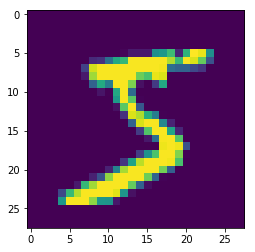

In [9]:
plt.imshow(sample_image)

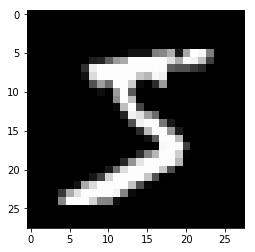

In [10]:
plt.imshow(sample_image, cmap='gray')

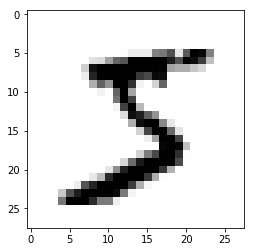

In [11]:
#Now the letter is white and background is black. We can reverse this using cmap='gray_r'
plt.imshow(sample_image, cmap='gray_r')

## We are doing one hot encoding to the labels so that the neural network understands better.

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0] #This is the digit 5. We can see that there is number 1 in the 6th index

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test,10)

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## In the first element in the training set, we could see that the the numbers vary from 0 to 255

In [21]:
x_train[0].max()

255

In [22]:
x_train[0].min()

0

## We are going to normalize these values between 0 and 1

In [23]:
x_train = x_train/255
x_test = x_test/255

## This scaling dont remove any data

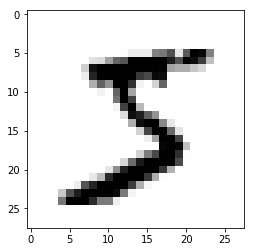

In [25]:
x_sample = x_train[0]
plt.imshow(x_sample, cmap='gray_r')

## Reshaping the Data
#### Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

#### This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

### Reshaping

In [28]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_test = x_test.reshape(10000,28,28,1)

In [31]:
x_test.shape

(10000, 28, 28, 1)

# Training the model

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [37]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0355 - acc: 0.9895
Epoch 2/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.0273 - acc: 0.9923
Epoch 3/10
60000/60000 [==============================] - 38s 641us/step - loss: 0.0213 - acc: 0.9940
Epoch 4/10
60000/60000 [==============================] - 39s 648us/step - loss: 0.0175 - acc: 0.9953
Epoch 5/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0140 - acc: 0.9963
Epoch 6/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.0113 - acc: 0.9969
Epoch 7/10
60000/60000 [==============================] - 44s 733us/step - loss: 0.0089 - acc: 0.9975
Epoch 8/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.0071 - acc: 0.9982
Epoch 9/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.0058 - acc: 0.9985
Epoch 10/10
60000/60000 [==============================] - 43s 708us/step - loss: 

## Evaluate the Model

In [38]:
model.metrics_names

['loss', 'acc']

In [39]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 238us/step


[0.06659578506952507, 0.989]

In [40]:
from sklearn.metrics import classification_report

In [41]:
predictions = model.predict_classes(x_test)

In [42]:
y_cat_test.shape

(10000, 10)

In [43]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [44]:
predictions[0]

7

In [45]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [46]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.98      0.99       958
          7       0.98      0.99      0.99      1028
          8       0.99      0.98      0.99       974
          9       0.98      0.99      0.98      1009

avg / total       0.99      0.99      0.99     10000

